In [337]:
!pip install pandas pyarrow
!pip install plotly

     -------------------------------------- 15.6/15.6 MB 381.6 kB/s eta 0:00:00


# Part 1 - Learning

In [333]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [313]:
# Reading the .feather file
df_m1 = pd.read_feather('./machine1.feather')
df_m2 = pd.read_feather('./machine2.feather')

In [314]:
# Include row only in 90 - 110
df_m1 = df_m1[(df_m1['check'] >= 90) & (df_m1['check'] <= 110)]
df_m2 = df_m2[(df_m2['check'] >= 90) & (df_m2['check'] <= 110)]

In [315]:
X_m1 = df_m1.drop(['check','power'], axis=1)
y_m1 = df_m1['power']
# print(X_m1)
# print(y_m1)

X_m2 = df_m2.drop(['check','power'], axis=1)
y_m2 = df_m2['power']
# print(X_m2)
# print(y_m2)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled_m1 = scaler_X.fit_transform(X_m1)
y_scaled_m1 = scaler_y.fit_transform(y_m1.values.reshape(-1, 1)).ravel()

X_scaled_m2 = scaler_X.fit_transform(X_m2)
y_scaled_m2 = scaler_y.fit_transform(y_m2.values.reshape(-1, 1)).ravel()

Explore the distribution of three features

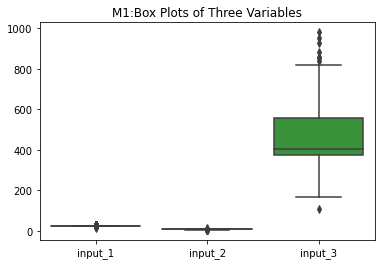

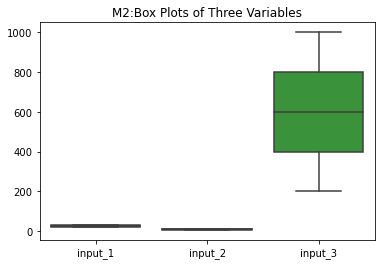

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=X_m1)
plt.title('M1:Box Plots of Three Variables')
plt.show()


sns.boxplot(data=X_m2)
plt.title('M2:Box Plots of Three Variables')
plt.show()

In the examination of the input3 variable within machine 1, certain outliers have been identified. A subsequent analysis will be conducted to determine whether the removal or treatment of these anomalies contributes to an enhancement in the overall accuracy of the predictive model.

In [317]:
# Remove outliers using IQR method
Q1 = X_m1.quantile(0.25)
Q3 = X_m1.quantile(0.75)
IQR = Q3-Q1
X_cleaned_m1 = X_m1[~((X_m1 < (Q1 - 1.5 * IQR))|(X_m1 > (Q3 + 1.5 * IQR))).any(axis=1)]
y_cleaned_m1 = y_m1[X_cleaned_m1.index]

Scale and normalized the feature space using PCA

In [318]:
from sklearn.decomposition import PCA

# Instantiate PCA
pca_m1 = PCA(n_components=3)

# Fit and transform the data
pca_result_m1 = pca_m1.fit_transform(X_scaled_m1)

# Normalize variance ratios
normalized_variances_m1 = pca_m1.explained_variance_ratio_ / pca_m1.explained_variance_ratio_.sum()

# Assign weights based on normalized variances
weights_m1 = 1 / normalized_variances_m1

# Normalize weights to sum to 1
weights_m1 = weights_m1 / weights_m1.sum()

# Adjusted explained variance ratios based on weights
adjusted_explained_variance_ratio_m1 = pca_m1.explained_variance_ratio_ * weights_m1

print("Original Explained Variance Ratios:", pca_m1.explained_variance_ratio_)
print("Normalized Variances:", normalized_variances_m1)
print("Assigned Weights:", weights_m1)
print("Adjusted Explained Variance Ratio:", adjusted_explained_variance_ratio_m1)

Original Explained Variance Ratios: [0.52092145 0.29880218 0.18027637]
Normalized Variances: [0.52092145 0.29880218 0.18027637]
Assigned Weights: [0.17752728 0.30949496 0.51297776]
Adjusted Explained Variance Ratio: [0.09247777 0.09247777 0.09247777]


In [319]:
# Split the data into training and testing sets
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(X_m1, y_m1, test_size=0.2, random_state=1)
X_clean_train_m1, X_clean_test_m1, y_clean_train_m1, y_clean_test_m1 = train_test_split(X_cleaned_m1, y_cleaned_m1, test_size=0.2, random_state=1)
X_scaled_train_m1, X_scaled_test_m1, y_scaled_train_m1, y_scaled_test_m1 = train_test_split(X_scaled_m1 * weights_m1, y_m1, test_size=0.2, random_state=1)

X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_m2, y_m2, test_size=0.2, random_state=1)
X_scaled_train_m2, X_scaled_test_m2, y_scaled_train_m2, y_scaled_test_m2 = train_test_split(X_scaled_m2, y_m2, test_size=0.2, random_state=1)

## Base Line Model

### Linear Regression

In [320]:
# Learn Machine 1 features
LR_model = LinearRegression()
LR_model.fit(X_train_m1, y_train_m1)
y_pred_m1 = LR_model.predict(X_test_m1)

# Calculate the mean squared error
mse_m1 = mean_squared_error(y_test_m1, y_pred_m1)
rmse_m1 = np.sqrt(mse_m1)
r2_m1 = r2_score(y_test_m1, y_pred_m1)
print('Machine1 Mean Squared Error:', mse_m1)
print('Machine1 Root Mean Squared Error:', rmse_m1)
print('Machine1 R2 score:', r2_m1)

Machine1 Mean Squared Error: 8.579015738121688
Machine1 Root Mean Squared Error: 2.92899568762429
Machine1 R2 score: 0.8117925178611584


In [321]:
# Learn machine 2 features
LR_model_m2 = LinearRegression()
LR_model_m2.fit(X_train_m2, y_train_m2)
y_pred_m2 = LR_model_m2.predict(X_test_m2)

# Calculate the mean squared error
mse_m2 = mean_squared_error(y_test_m2, y_pred_m2)
rmse_m2 = np.sqrt(mse_m2)
r2_m2 = r2_score(y_test_m2, y_pred_m2)
print('Machine2 Mean Squared Error:', mse_m2)
print('Machine2 Root Mean Squared Error:', rmse_m2)
print('Machine2 R2 score:', r2_m2)

# Use scaled feature input
LR_model_scaled_m2 = LinearRegression()
LR_model_scaled_m2.fit(X_scaled_train_m2, y_scaled_train_m2)
y_pred_scaled_m2 = LR_model_scaled_m2.predict(X_scaled_test_m2)

mse_scaled_m2 = mean_squared_error(y_scaled_test_m2, y_pred_scaled_m2)
rmse_scaled_m2 = np.sqrt(mse_scaled_m2)
r2_scaled_m2 = r2_score(y_scaled_test_m2, y_pred_scaled_m2)
print('\nMachine2 Mean Squared Error with scaled input:', mse_scaled_m2)
print('Machine2 Root Mean Squared Error with scaled input:', rmse_scaled_m2)
print('Machine2 R2 score with scaled input:', r2_scaled_m2)

Machine2 Mean Squared Error: 171.79790295553974
Machine2 Root Mean Squared Error: 13.107169906411519
Machine2 R2 score: 0.789617114293149

Machine2 Mean Squared Error with scaled input: 171.79790295554042
Machine2 Root Mean Squared Error with scaled input: 13.107169906411544
Machine2 R2 score with scaled input: 0.7896171142931481


### Ridge Regression

In [322]:
# Create and fit the model
ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train_m1, y_train_m1)
y_pred_m1 = ridge_model.predict(X_test_m1)
mse_m1 = mean_squared_error(y_test_m1, y_pred_m1)
rmse_m1 = np.sqrt(mse_m1)
r2 = r2_score(y_test_m1, y_pred_m1)

print('Mean Squared Error:', mse_m1)
print('Root Mean Squared Error:', rmse_m1)
print('R2 score:', r2)


ridge_model.fit(X_scaled_train_m1, y_train_m1)
y_pred_m1 = ridge_model.predict(X_scaled_test_m1)
mse_m1 = mean_squared_error(y_test_m1, y_pred_m1)
rmse_m1 = np.sqrt(mse_m1)
r2 = r2_score(y_test_m1, y_pred_m1)

print('Scaled Mean Squared Error:', mse_m1)
print('Scaled Root Mean Squared Error:', rmse_m1)
print('Scaled R2 score:', r2)

ridge_model.fit(X_clean_train_m1, y_clean_train_m1)
y_pred_m1 = ridge_model.predict(X_clean_test_m1)
mse_m1 = mean_squared_error(y_clean_test_m1, y_pred_m1)
rmse_m1 = np.sqrt(mse_m1)
r2 = r2_score(y_clean_test_m1, y_pred_m1)

print('Cleaned Mean Squared Error:', mse_m1)
print('Cleaned Root Mean Squared Error:', rmse_m1)
print('Cleaned R2 score:', r2)

Mean Squared Error: 8.579746560412609
Root Mean Squared Error: 2.929120441431627
R2 score: 0.8117764849935819
Scaled Mean Squared Error: 8.777503067493024
Scaled Root Mean Squared Error: 2.962685111093149
Scaled R2 score: 0.807438078886132
Cleaned Mean Squared Error: 5.457388019457828
Cleaned Root Mean Squared Error: 2.3361053100101947
Cleaned R2 score: 0.5832813932532854


In [323]:
# Learn machine 2 features
ridge_model_m2 = Ridge(alpha=1.0)
ridge_model_m2.fit(X_train_m2, y_train_m2)
y_pred_m2 = ridge_model_m2.predict(X_test_m2)

# Calculate the mean squared error
mse_m2 = mean_squared_error(y_test_m2, y_pred_m2)
rmse_m2 = np.sqrt(mse_m2)
r2_m2 = r2_score(y_test_m2, y_pred_m2)
print('Machine2 Mean Squared Error:', mse_m2)
print('Machine2 Root Mean Squared Error:', rmse_m2)
print('Machine2 R2 score:', r2_m2)

# Use scaled feature input
ridge_model_scaled_m2 = Ridge(alpha=1.0)
ridge_model_scaled_m2.fit(X_scaled_train_m2, y_scaled_train_m2)
y_pred_scaled_m2 = ridge_model_scaled_m2.predict(X_scaled_test_m2)

mse_scaled_m2 = mean_squared_error(y_scaled_test_m2, y_pred_scaled_m2)
rmse_scaled_m2 = np.sqrt(mse_scaled_m2)
r2_scaled_m2 = r2_score(y_scaled_test_m2, y_pred_scaled_m2)
print('\nMachine2 Mean Squared Error with scaled input:', mse_scaled_m2)
print('Machine2 Root Mean Squared Error with scaled input:', rmse_scaled_m2)
print('Machine2 R2 score with scaled input:', r2_scaled_m2)

Machine2 Mean Squared Error: 170.94745112647263
Machine2 Root Mean Squared Error: 13.074687419838098
Machine2 R2 score: 0.7906585735128235

Machine2 Mean Squared Error with scaled input: 144.71104620961856
Machine2 Root Mean Squared Error with scaled input: 12.029590442305945
Machine2 R2 score with scaled input: 0.8227875487914662


## Random Forest

### Machine 1

In [324]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor()
rf_gs_m1 = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

rf_gs_m1.fit(X_train_m1, y_train_m1)
print("Best hyperparameters:", rf_gs_m1.best_params_)
print("Best score:", rf_gs_m1.best_score_)

rf_gs_m1_scaled = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
rf_gs_m1_scaled.fit(X_scaled_train_m1, y_train_m1)
print("Best hyperparameters with scaled input:", rf_gs_m1_scaled.best_params_)
print("Best score with scaled input:", rf_gs_m1_scaled.best_score_)

rf_gs_m1_cleaned = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
rf_gs_m1_cleaned.fit(X_clean_train_m1, y_clean_train_m1)
print("Best hyperparameters with cleaned input:", rf_gs_m1_cleaned.best_params_)
print("Best score with cleaned input:", rf_gs_m1_cleaned.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.7830049311283409
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters with scaled input: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best score with scaled input: 0.7821093611795015
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters with cleaned input: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score with cleaned input: 0.49998173332763507


In [325]:
best_rdf = rf_gs_m1.best_estimator_
rdf_pred = best_rdf.predict(X_test_m1)
acc_rdf = r2_score(rdf_pred, y_test_m1) 
print("The Random Forest test accuracy: {0:.3g}".format(acc_rdf))

best_rdf_scaled = rf_gs_m1_scaled.best_estimator_
rdf_pred_scaled = best_rdf_scaled.predict(X_scaled_test_m1)
acc_rdf_scaled = r2_score(rdf_pred_scaled, y_test_m1) 
print("The Random Forest with scaled input test accuracy: {0:.3g}".format(acc_rdf_scaled))

best_rdf_cleaned = rf_gs_m1_cleaned.best_estimator_
rdf_pred_cleaned = best_rdf_cleaned.predict(X_clean_test_m1)
acc_rdf_cleaned = r2_score(rdf_pred_cleaned, y_clean_test_m1) 
print("The Random Forest with cleaned input test accuracy: {0:.3g}".format(acc_rdf_cleaned))

The Random Forest test accuracy: 0.839
The Random Forest with scaled input test accuracy: 0.817
The Random Forest with cleaned input test accuracy: 0.51


### Machine 2

In [326]:
rf_gs_m2 = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

rf_gs_m2.fit(X_train_m2, y_train_m2)
print("Best hyperparameters:", rf_gs_m2.best_params_)
print("Best score:", rf_gs_m2.best_score_)

rf_gs_m2_scaled = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
rf_gs_m2_scaled.fit(X_scaled_train_m2, y_train_m2)
print("Best hyperparameters with scaled input:", rf_gs_m2_scaled.best_params_)
print("Best score with scaled input:", rf_gs_m2_scaled.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.912146599142251
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters with scaled input: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score with scaled input: 0.9060086011494152


In [327]:
best_rdf_m2 = rf_gs_m2.best_estimator_
rdf_pred_m2 = best_rdf_m2.predict(X_test_m2)
acc_rdf_m2 = r2_score(rdf_pred_m2, y_test_m2) 
print("The Random Forest test accuracy: {0:.3g}".format(acc_rdf_m2))

best_rdf_scaled_m2 = rf_gs_m2_scaled.best_estimator_
rdf_pred_scaled_m2 = best_rdf_scaled_m2.predict(X_scaled_test_m2)
acc_rdf_scaled_m2 = r2_score(rdf_pred_scaled_m2, y_test_m2) 
print("The Random Forest with scaled input test accuracy: {0:.3g}".format(acc_rdf_scaled_m2))

The Random Forest test accuracy: 0.788
The Random Forest with scaled input test accuracy: 0.822


## Result

The most effective predictive model in this context is the Random Forest Regressor. Following a comprehensive grid search to optimize the combination of hyperparameters, two distinct approaches were identified for machines one and two. For machine one, the utilization of unscaled and cleaned data yielded the optimal results, achieving a test accuracy of 83.9%. Conversely, for machine two, the application of scaled data proved to be the most efficacious approach, resulting in an accuracy rate of 82.2%

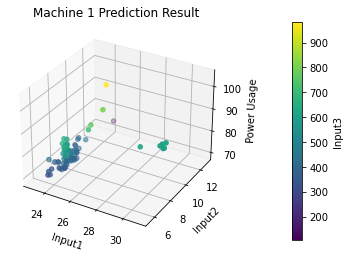

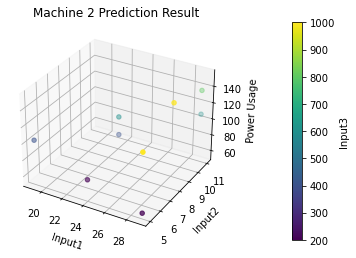

In [328]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_test_m1['input_1'], X_test_m1['input_2'], y_test_m1, c=X_test_m1['input_3'])
ax.set_xlabel('Input1')
ax.set_ylabel('Input2')
ax.set_zlabel('Power Usage')
plt.title('Machine 1 Prediction Result')
cbar = plt.colorbar(scatter, ax=ax, pad=0.2) 
cbar.set_label('Input3')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
scatter2 = ax2.scatter(X_test_m2['input_1'], X_test_m2['input_2'], y_test_m2, c=X_test_m2['input_3'])
ax2.set_xlabel('Input1')
ax2.set_ylabel('Input2')
ax2.set_zlabel('Power Usage')
plt.title('Machine 2 Prediction Result')
cbar2 = plt.colorbar(scatter2, ax=ax2, pad=0.2) 
cbar2.set_label('Input3')

plt.show()

From the graphical representation of machine one, a discernible illustration emerges that delineates a positive correlation between both the input2 and input3 variables and the power usage. As these inputs increase, an expected growth in power consumption can be observed. Conversely, input1 appears to have no substantial relationship with the power usage, as indicated by the absence of any strong correlation.

Similarly, the 3D scatter plot of machine 2 reveals a positive correlation between input3 and power usage. However, due to the constraints of a limited dataset, the relationships between input1 and input2 with power usage fail to exhibit any salient patterns, rendering the detection of clear correlations challenging.

# Part 2 - Optimization

In [329]:
from scipy.optimize import differential_evolution

In [330]:
num_machine1 = 10
num_machine2 = 10
input1 = 25
input2 = 6
bounds_machine1 = (180, 600)
bounds_machine2 = (300, 1000)

bounds = [bounds_machine1] * num_machine1 + [bounds_machine2] * num_machine2

# Calculate initial guess for each machine type
initial_gph_machine1 = min(bounds_machine1[1], (9000 // (num_machine1 + num_machine2)))
initial_gph_machine2 = min(bounds_machine2[1], (9000 // (num_machine1 + num_machine2)))

# Evenly divides the total target GPH (9,000) among the machines
initial_guess = [initial_gph_machine1] * num_machine1 + [initial_gph_machine2] * num_machine2

df1 = pd.DataFrame([[input1, input2, bounds_machine1[1]]])
df1.columns = ['input_1', 'input_2', 'input_3']
power_m1 = best_rdf.predict(df1)
df2 = pd.DataFrame([[input1, input2, bounds_machine2[1]]])
df2.columns = ['input_1', 'input_2', 'input_3']
power_m2 = best_rdf_m2.predict(df2)
max_power = bounds_machine1[1] * num_machine1 + bounds_machine2[1] * num_machine2


def objective(gph_values):
    if all(element % 50 == 0 for element in gph_values[-10:]):
#         print(gph_values)
        total_power = 0
        total_gph = 0
        for i, gph in enumerate(gph_values):
            input3 = gph
            df = pd.DataFrame([[input1, input2, input3]])
            df.columns = ['input_1', 'input_2', 'input_3']
            if i < 10: # Machine type #1
                power = best_rdf.predict(df)
                total_power += power
            else: # Machine type #2
                power = best_rdf_m2.predict(df)
                total_power += power
            total_gph += gph
        return total_power if total_gph == 9000 else max_power
        pass 
    else: 
        return max_power

In [331]:
result = differential_evolution(objective, x0=initial_guess, bounds=bounds)
total_power = result.fun
optimized_input3 = result.x
print("The minimum total power usage is: ", total_power)
print("GPH of each machines: ", optimized_input3) # First ten numbers are machine 1 and last ten are machine 2

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


The minimum total power usage is:  1647.0367274803173
GPH of each machines:  [450. 450. 450. 450. 450. 450. 450. 450. 450. 450. 450. 450. 450. 450.
 450. 450. 450. 450. 450. 450.]


## Summary

In [340]:
import plotly.graph_objects as go

def best_rdf_predict(input_data):
    return best_rdf.predict(input_data)

def best_rdf_m2_predict(input_data):
    return best_rdf_m2.predict(input_data)

input3_range_1 = list(range(bounds_machine1[0],bounds_machine1[1]))
cost_values_1 = [best_rdf_predict(pd.DataFrame([[input1, input2, i]]))[0] for i in input3_range_1]

input3_range_2 = list(range(bounds_machine2[0],bounds_machine2[1]))
cost_values_2 = [best_rdf_m2_predict(pd.DataFrame([[input1, input2, i]]))[0] for i in input3_range_2]

fig = go.Figure()

fig.add_trace(go.Scatter(x=input3_range_1, y=cost_values_1, mode='lines', name='Model 1'))
fig.add_trace(go.Scatter(x=input3_range_2, y=cost_values_2, mode='lines', name='Model 2'))

fig.update_layout(
    title='Comparison of Power Usage from Two Models',
    xaxis_title='GPH (input3)',
    yaxis_title='Power Usage'
)

fig.show()

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\ali94\anaconda3\envs\CV\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not hav

An analysis of the aforementioned line chart reveals that the input3 (GPH) value for machine 2 exhibits a step-like pattern rather than continuous variation, a phenomenon attributable to the constraints of the limited dataset, as illustrated in the accompanying visual representation. In response to this observation, the objective function has been carefully tailored to include a constraint stipulating that the GPH value of machine 2 must be divisible only by 50.

Further insight can be gleaned from the line chart, which highlights that machine 1 operates with greater power efficiency than machine 2. This is evidenced by the fact that machine 1 achieves the maximum GPH value while still consuming less total power than machine 2 does at its minimum GPH. Consequently, in pursuing the goal of minimizing the total power consumption across 20 machines, an optimal strategy would seek to maximize the GPH of machine 1 and minimize the GPH of machine 2.

It should also be noted that the selection of the initial guess represents a critical starting point in the optimization process. As the focus of this problem extends beyond local optima to encompass the global minimum, the application of differential evolution—an algorithm renowned for its ability to navigate the complexities of global optimization—provides an advantageous means of identifying the multivariate function's global minimum.